<div style="padding: 35px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;">
<b>
<span style='color:skyblue'>IEEE FCIH SB Machine Learning season 2025 </span>
</b>
<div>
<span style='color:Salmon'>Unsupervised Learning</span>

</div>

</div>

<br>


# <span style="color : skyblue" id="1">ICA</span>
> Independent component analysis

>Independent Component Analysis (ICA) is a computational technique used in signal processing and data analysis to separate a multivariate signal into additive, statistically independent components. It is a method for blind source separation, which means it can separate a set of mixed signals into their original source signals without knowing the characteristics of the sources or the mixing process.

ICA has applications in various fields, including:

1. **Audio Source Separation**: Separating different sound sources (e.g., instruments or voices) from a mixed audio recording.
2. **Image Processing**: Extracting independent features or sources from mixed images.
3. **Neuroscience**: Analyzing brain signals (e.g., EEG or fMRI data) to identify independent neural sources.
4. **Financial Data Analysis**: Separating underlying factors or market trends from financial time series data.
5. **Speech Recognition**: Separating different speakers' voices in a recorded conversation.

# <span style="color:skyblue" id="2">Mixed Music dataset🎵</span>
We have three WAVE files, each of which is a mix

## <h2 id="21">How to deal with Audio🔉</h2>
Dealing with audio files in Python involves various tasks such as reading, writing, processing, and analyzing audio data. To work with audio files in Python, you can use libraries like `librosa`, `soundfile`, and `pydub`. 

You can process audio data using libraries like `numpy` . For example, you can apply filters, perform Fourier transforms, or manipulate audio signals.

```python
import numpy as np

# Example: Apply a simple gain (volume) change
audio_data *= 2.0  # Increase volume by a factor of 2

```
    
- **Audio Playback**:
    
    To play audio directly from Python, you can use the `pydub` library. Install it first:
    
    ```bash
    pip install pydub
    
    ```
    
    Then, you can play audio like this:
    
    ```python
    from pydub import AudioSegment
    from pydub.playback import play
    
    audio = AudioSegment.from_file("your_audio.wav")
    play(audio)
    
    ```
    

In [2]:
from pydub import AudioSegment
import IPython
import numpy as np
import wave

`AudioSegment` is the core class in `pydub` that represents an audio file (e.g., MP3, WAV, etc.) as a Python object. You can use it to:

* Load audio from a file or raw bytes
* Slice, trim, concatenate audio
* Change volume, speed, or apply effects
* Export modified audio to a new file
---------------
The `wave` module is part of Python’s standard library, and it's used for reading and writing uncompressed WAV files.



In [31]:
# audio1 = wave.open('Music/ICA mix 1.wav', 'r') #one way to read a wav file
audio1 = AudioSegment.from_wav('/kaggle/input/icamusical/ICA mix 1.wav') #another way to read a wav file

In [4]:
# show the audio file information 
print("Audio parameters:")
print(f"Channels     : {audio1.channels}")
print(f"Sample width : {audio1.sample_width} bytes")
print(f"Frame rate   : {audio1.frame_rate} Hz")
print(f"Frame count  : {audio1.frame_count()}")
print(f"Duration     : {audio1.duration_seconds:.2f} seconds")
print(f"Volume (dBFS): {audio1.dBFS:.2f} dB")



Audio parameters:
Channels     : 1
Sample width : 2 bytes
Frame rate   : 44100 Hz
Frame count  : 264515.0
Duration     : 6.00 seconds
Volume (dBFS): -15.22 dB


1. **Mono (1 Channel)**:
    - Mono audio contains a single audio channel.
    - It is often used for voice recordings, podcasts, and some types of music.
2. **Stereo (2 Channels)**:
    - Stereo audio consists of two audio channels: a left channel and a right channel.
    - Stereo is used for most music recordings, as it allows for the creation of a spatial or directional audio experience.
3. **Multichannel (More than 2 Channels)**:
    - Multichannel audio can have more than two channels, such as 5.1 (five primary channels plus a subwoofer channel) or 7.1 (seven primary channels plus a subwoofer channel).
    - It is commonly used in home theater systems, surround sound setups, and advanced audio production.
>https://youtu.be/48ExvlterwY?si=52cWXKOgUgMGbaGb 📺 this video can be helpful

1. **`nchannels`**: This parameter specifies the number of audio channels in the audio file. In this case, it's set to **`1`**, indicating that the audio is monaural (single channel).
2. **`sampwidth`**: **`sampwidth`** specifies the sample width or the number of bytes used to represent each audio sample. A value of **`2`** typically represents 16-bit audio, which is a common format for CD-quality audio.
3. **`framerate`**: **`framerate`** indicates the number of samples (audio data points) recorded per second. In this case, it's set to **`44100`**, which is the standard sample rate for audio CDs and is often used for high-quality audio recordings.
4. **`nframes`**: **`nframes`** represents the total number of audio frames or samples in the audio file. In your example, it's set to **`264515`**, which means the audio file contains 264,515 audio frames.
5. **`comptype`**: This parameter specifies the compression type used for the audio file. In this case, it's **`'NONE'`**, indicating that the audio is not compressed. Uncompressed audio is common for high-quality audio recordings.
6. **`compname`**: **`compname`** provides the name of the compression scheme used, and in this case, it's **`'not compressed'`**, which corresponds to the fact that the audio is not compressed

>So this file has only channel which means it's mono sound.
>It has a frame rate of 44100, which means each second of sound is represented by 44100 integers (integers because the file is in the common PCM 16-bit format).
>The file has a total of 264515 integers/frames, which means its length in seconds is:`264515/44100 = 5.998072562358277`

In [5]:
audio1.duration_seconds

5.998072562358277

In [22]:
type(audio1)

pydub.audio_segment.AudioSegment

In [8]:
audio1 # or IPython.display.display(audio1)

In [16]:
len(audio1) # returns the duration of the audio in milliseconds (1000ms = 1s)

5998

In [14]:
audio1[1000:2000] # from sec1 -> sec2 

In [23]:
audio1.reverse() # to reverse the audio 

In [25]:
# increaseing the volumne by 10
audio1 += 10
audio1

In [32]:
# TODO : decrease the volume by 10


>This step converts an audio file into a structured NumPy array of raw sample values, making it suitable for analysis or machine learning (like ICA).

| Part                              | Explanation                                                                                                                                     |
| --------------------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------- |
| `audio1.get_array_of_samples()`   | Extracts the raw audio samples from the `AudioSegment` as a flat 1D array. If stereo, samples are interleaved (L, R, L, R...).                  |
| `np.array(..., dtype=np.int16)`   | Converts the sample array into a NumPy array with 16-bit precision (standard for PCM audio).                                                    |
| `.reshape((-1, audio1.channels))` | If the audio has more than one channel (e.g., stereo), this separates the interleaved samples into a 2D array: each column becomes one channel. |

You need this transformation because:

`AudioSegment` is designed for editing, not analysis.

NumPy arrays give you direct access to sample data for:

* ICA

* Filtering

* Plotting

* Spectral analysis

* ML models

--------------------------------------

>Pulse-Code Modulation (PCM) 16-bit is a digital audio format where each sample is stored as a 16-bit signed integer, allowing 2¹⁶ = 65,536 amplitude levels (from –32,768 to +32,767). This high resolution captures fine sound detail and is standard in WAV and CD audio.





In [33]:
# extract the frames of the wave file, which will be a part of the dataset we'll run ICA against
# Extract samples as a NumPy array of 16-bit integers
signal_1 = np.array(audio1.get_array_of_samples(), dtype=np.int16)
signal_1.shape

(264515,)

In [34]:
signal_1[:100]

array([  879,  1268,  1460,  1756,  1943,  2216,  2407,  2668,  2866,
        3106,  3308,  3546,  3752,  3981,  4175,  4395,  4588,  4790,
        4966,  5146,  5292,  5436,  5550,  5643,  5717,  5759,  5790,
        5798,  5789,  5756,  5713,  5649,  5576,  5478,  5381,  5267,
        5146,  4999,  4856,  4682,  4502,  4308,  4097,  3875,  3637,
        3380,  3107,  2825,  2514,  2194,  1847,  1472,  1087,   671,
         227,  -219,  -691, -1176, -1666, -2167, -2669, -3179, -3668,
       -4170, -4643, -5116, -5559, -5985, -6380, -6765, -7105, -7422,
       -7706, -7955, -8163, -8339, -8470, -8557, -8600, -8618, -8585,
       -8524, -8425, -8298, -8129, -7947, -7720, -7475, -7205, -6916,
       -6606, -6266, -5922, -5556, -5165, -4774, -4353, -3922, -3476,
       -3021], dtype=int16)

# <h1 style="color:skyblue" id="3">Visualizing Audio Files🎵</h1>

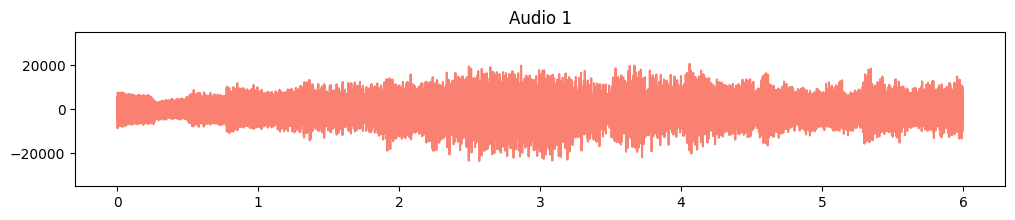

In [37]:
import matplotlib.pyplot as plt

# The sample rate represents the number of audio samples recorded per second
sr = audio1.frame_rate
# numpy.linspace(start, stop, num=50)
timing = np.linspace(0, len(signal_1)/sr, num=len(signal_1)) # one timestep for each sample 

plt.figure(figsize=(12,2))
plt.title('Audio 1')
plt.plot(timing,signal_1, c="salmon")
plt.ylim(-35000, 35000)
plt.show()

`len(signal_1)` = total number of samples in the audio

`sr = sample rate`, i.e., how many samples per second (e.g., 44100 Hz)

`len(signal_1)/sr` = total duration of the audio in seconds

`np.linspace(0, duration, num=samples)`
This generates a time array:

Starts at 0 seconds

Ends at the total duration of the audio

Contains exactly one time value per sample (num=len(signal_1))

This means:

Each x-coordinate in the plot now represents "time in seconds", and each y-coordinate represents "amplitude at that time".

## <h2 style="color:skyblue" id ="32">Reading 2 other music files</h2>

In [39]:
# TODO read the other two audio files 
# read audio2
audio2 = AudioSegment.from_wav("/kaggle/input/icamusical/ICA mix 2.wav")
# read audio3 
audio3 = AudioSegment.from_wav("/kaggle/input/icamusical/ICA mix 3.wav")

In [49]:
display("mix1", audio1)
display("mix2", audio2)
display("mix3", audio3)

'mix1'

'mix2'

'mix3'

In [50]:
# TODO :  extract the numpy signal 
signal_2 = np.array(audio2.get_array_of_samples(), dtype=np.int16)
signal_3 = np.array(audio1.get_array_of_samples(), dtype=np.int16)

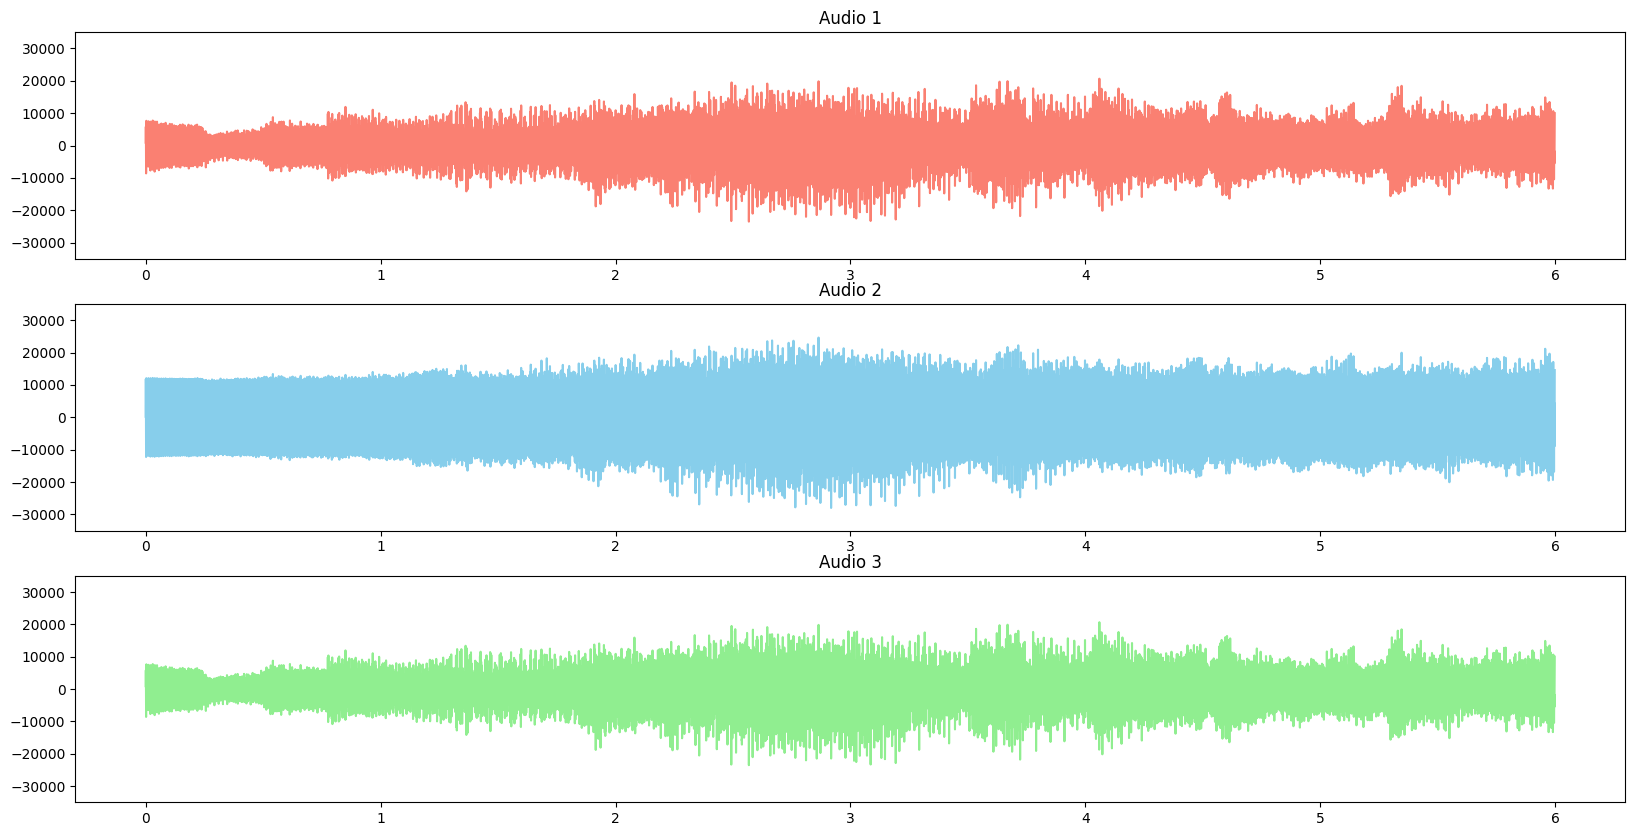

In [51]:
# plot the three records waves in a subplot 
ax = [None for _ in range(3)]
plt.figure(figsize=(20, 10))


ax[0] = plt.subplot2grid((3,1), (0,0))
ax[0].plot(timing, signal_1, c="salmon")
ax[0].set_title("Audio 1")

ax[1] = plt.subplot2grid((3,1), (1,0))
ax[1].plot(timing, signal_2, c="skyblue")
ax[1].set_title("Audio 2")

ax[2] = plt.subplot2grid((3,1), (2,0))
ax[2].plot(timing, signal_3, c="lightgreen")
ax[2].set_title("Audio 3")

# setting the ylim 
ylim = (-35000, 35000)
for i in range(3):
    ax[i].set_ylim(ylim)

# <h1 style="color:skyblue" id="5">Creating the dataset from the music files</h1>

ex1
```python
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
np.vstack((a,b))

array([[1, 2, 3],
       [4, 5, 6]])
```
ex2
```python
a = np.array([[1], [2], [3]])
b = np.array([[4], [5], [6]])
np.vstack((a,b))
array([[1],
       [2],
       [3],
       [4],
       [5],
       [6]])
```
https://numpy.org/doc/stable/reference/generated/numpy.vstack.html

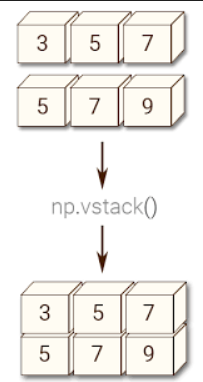


In [56]:
# recall the shapes 
signal_1.shape

(264515,)

In [58]:
print(signal_1)

[  879  1268  1460 ...  9204  9553 10006]


In [59]:
# Combine the audio signals into a 2D NumPy array (X)
X = np.vstack((signal_1, signal_2, signal_3))
print(X)

# Transpose the array so that each row corresponds to a signal
X = X.T # each signal would be a feature or a column
print("="*20)
print("After transposing...")
print(X)

[[  879  1268  1460 ...  9204  9553 10006]
 [  157   899  1610 ... 13386 14016 14596]
 [  879  1268  1460 ...  9204  9553 10006]]
After transposing...
[[  879   157   879]
 [ 1268   899  1268]
 [ 1460  1610  1460]
 ...
 [ 9204 13386  9204]
 [ 9553 14016  9553]
 [10006 14596 10006]]


# <h1 style="color:skyblue" id="6">Applying the ICA</h1>

In [74]:
from sklearn.decomposition import FastICA

# Create an ICA model
ica = FastICA(n_components=3, random_state=0)


# Fit the model to the mixed signals
sources = ica.fit_transform(X)

/usr/local/lib/python3.11/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


In [75]:
# sources now contains the result of FastICA, which we hope are the original signals. It's in the shape
sources.shape

(264515, 3)

In [76]:
print(sources)

[[-5.43738339e-05 -5.07791432e-04 -5.27386820e-04]
 [ 1.40225059e-04 -6.22928814e-04 -6.56112067e-04]
 [ 3.59570152e-04 -5.65708355e-04 -6.60880438e-04]
 ...
 [ 3.65205261e-03 -3.46757605e-03 -3.61562543e-03]
 [ 3.72968766e-03 -3.64585354e-03 -3.75621788e-03]
 [ 3.55483743e-03 -4.09831240e-03 -3.97823028e-03]]


## <h2 style="color:skyblue" id="6.1">Results of the ICA</h2>

In [77]:
# Let's split into separate signals and look at them
source_1 = sources[:, 0]
source_2 = sources[:, 1]
source_3 = sources[:, 2]

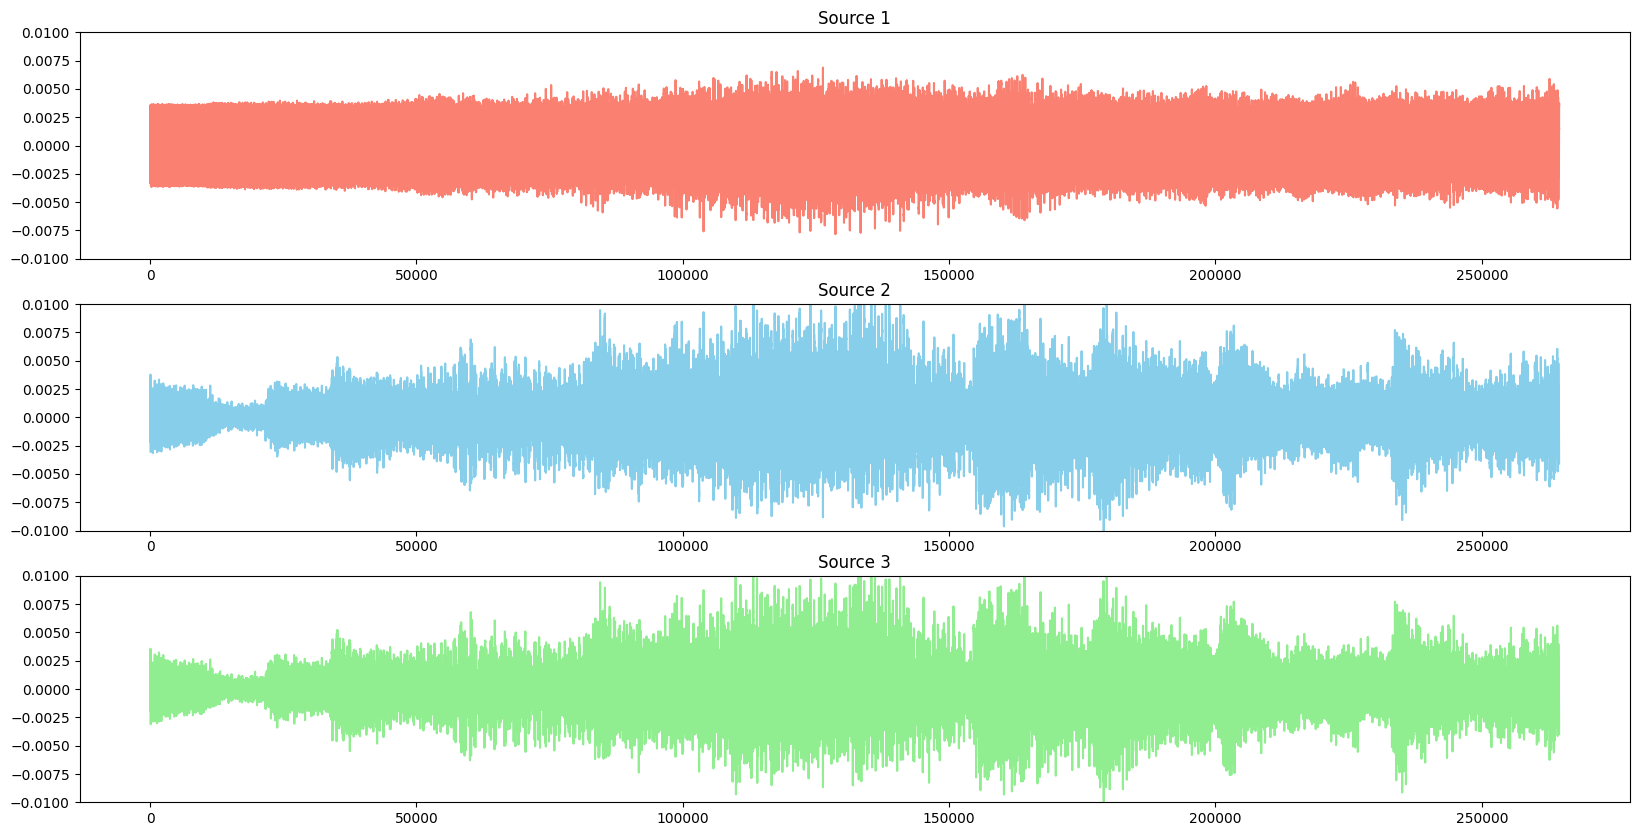

In [78]:
# plotting the results
ax = [None for _ in range(3)]
plt.figure(figsize=(20, 10))

# Independent Component #1
ax[0] = plt.subplot2grid((3,1), (0,0))
ax[0].plot(source_1, c="salmon")
ax[0].set_title("Source 1")

# Independent Component #2
ax[1] = plt.subplot2grid((3,1), (1,0))
ax[1].plot(source_2, c="skyblue")
ax[1].set_title("Source 2")

# Independent Component #2
ax[2] = plt.subplot2grid((3,1), (2,0))
ax[2].plot(source_3, c="lightgreen")
ax[2].set_title("Source 3")

# setting the ylim 
ylim = -0.010, 0.010
for i in range(3):
    ax[i].set_ylim(ylim)

In [80]:
# Convert the separated audio signals to 16-bit signed integers
result_source_1_int = (source_1 * 32767 * 100).astype(np.int16)
result_source_2_int = (source_2 * 32767 * 100).astype(np.int16)
result_source_3_int = (source_3 * 32767 * 100).astype(np.int16)
'''
It scales the signal values by multiplying them by 32767*100. This scaling is done to map the float values 
to the range of a 16-bit signed integer (-32768 to 32767). Additionally, 
it multiplies by 100 to increase the volume of the signals.  🔊 🆙 
'''

'\nIt scales the signal values by multiplying them by 32767*100. This scaling is done to map the float values \nto the range of a 16-bit signed integer (-32768 to 32767). Additionally, \nit multiplies by 100 to increase the volume of the signals.  🔊 🆙 \n'

In [82]:
from scipy.io import wavfile
# Writing wave files
wavfile.write("source1.wav", sr, result_source_1_int)
wavfile.write("source2.wav", sr, result_source_2_int)
wavfile.write("source3.wav", sr, result_source_3_int)

In [83]:
# List of audio file paths
audio_files = ['source1.wav', 'source2.wav', 'source3.wav']

# Display audio files vertically
for audio_file in audio_files:
    print(audio_file)
    display(Audio(audio_file))

source1.wav


source2.wav


source3.wav


>ICA becomes particularly valuable when you have multiple mixed signals (e.g., multiple microphones recording audio in a room with multiple sound sources) and you want to separate those mixed signals into their original independent sources (e.g., separating different speakers' voices from a microphone array).

# <h1 style="color: skyblue" id="7">PCA</h1>

# <h1 style="color: skyblue" id="8">MNIST dataset 0️⃣9️⃣</h1>

In [84]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.image as mpimg
from PIL import Image
import seaborn as sns

In [85]:
# train 
train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
# test 
test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
# train sahpe and test shape
f'train shape {train.shape}', f'test shape {test.shape}'

('train shape (42000, 785)', 'test shape (28000, 784)')

In [86]:
train.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [87]:
train.head()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [88]:
train.sample(1)

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
32672      3       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
32672       0  ...         0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
32672         0         0         0         0         0  

[1 rows x 785 columns]

In [89]:
train.describe()

label   pixel0   pixel1   pixel2   pixel3   pixel4   pixel5  \
count  42000.000000  42000.0  42000.0  42000.0  42000.0  42000.0  42000.0   
mean       4.456643      0.0      0.0      0.0      0.0      0.0      0.0   
std        2.887730      0.0      0.0      0.0      0.0      0.0      0.0   
min        0.000000      0.0      0.0      0.0      0.0      0.0      0.0   
25%        2.000000      0.0      0.0      0.0      0.0      0.0      0.0   
50%        4.000000      0.0      0.0      0.0      0.0      0.0      0.0   
75%        7.000000      0.0      0.0      0.0      0.0      0.0      0.0   
max        9.000000      0.0      0.0      0.0      0.0      0.0      0.0   

        pixel6   pixel7   pixel8  ...      pixel774      pixel775  \
count  42000.0  42000.0  42000.0  ...  42000.000000  42000.000000   
mean       0.0      0.0      0.0  ...      0.219286      0.117095   
std        0.0      0.0      0.0  ...      6.312890      4.633819   
min        0.0      0.0      0.0  ...      0.000000      0.000000   
25%        0.0      0.0      0.0  ...      0.000000      0.000000   
50%        0.0      0.0      0.0  ...      0.000000      0.000000   
75%        0.0      0.0      0.0  ...      0.000000      0.000000   
max        0.0      0.0      0.0  ...    254.000000    254.000000   

           pixel776     pixel777      pixel778      pixel779  pixel780  \
count  42000.000000  42000.00000  42000.000000  42000.000000   42000.0   
mean       0.059024      0.02019      0.017238      0.002857       0.0   
std        3.274488      1.75987      1.894498      0.414264       0.0   
min        0.000000      0.00000      0.000000      0.000000       0.0   
25%        0.000000      0.00000      0.000000      0.000000       0.0   
50%        0.000000      0.00000      0.000000      0.000000       0.0   
75%        0.000000      0.00000      0.000000      0.000000       0.0   
max      253.000000    253.00000    254.000000     62.000000       0.0   

       pixel781  pixel782  pixel783  
count   42000.0   42000.0   42000.0  
mean        0.0       0.0       0.0  
std         0.0       0.0       0.0  
min         0.0       0.0       0.0  
25%         0.0       0.0       0.0  
50%         0.0       0.0       0.0  
75%         0.0       0.0       0.0  
max         0.0       0.0       0.0  

[8 rows x 785 columns]

In [90]:
test.describe()

pixel0   pixel1   pixel2   pixel3   pixel4   pixel5   pixel6   pixel7  \
count  28000.0  28000.0  28000.0  28000.0  28000.0  28000.0  28000.0  28000.0   
mean       0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
std        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
min        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
25%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
50%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
75%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
max        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

        pixel8   pixel9  ...      pixel774      pixel775      pixel776  \
count  28000.0  28000.0  ...  28000.000000  28000.000000  28000.000000   
mean       0.0      0.0  ...      0.164607      0.073214      0.028036   
std        0.0      0.0  ...      5.473293      3.616811      1.813602   
min        0.0      0.0  ...      0.000000      0.000000      0.000000   
25%        0.0      0.0  ...      0.000000      0.000000      0.000000   
50%        0.0      0.0  ...      0.000000      0.000000      0.000000   
75%        0.0      0.0  ...      0.000000      0.000000      0.000000   
max        0.0      0.0  ...    253.000000    254.000000    193.000000   

           pixel777      pixel778  pixel779  pixel780  pixel781  pixel782  \
count  28000.000000  28000.000000   28000.0   28000.0   28000.0   28000.0   
mean       0.011250      0.006536       0.0       0.0       0.0       0.0   
std        1.205211      0.807475       0.0       0.0       0.0       0.0   
min        0.000000      0.000000       0.0       0.0       0.0       0.0   
25%        0.000000      0.000000       0.0       0.0       0.0       0.0   
50%        0.000000      0.000000       0.0       0.0       0.0       0.0   
75%        0.000000      0.000000       0.0       0.0       0.0       0.0   
max      187.000000    119.000000       0.0       0.0       0.0       0.0   

       pixel783  
count   28000.0  
mean        0.0  
std         0.0  
min         0.0  
25%         0.0  
50%         0.0  
75%         0.0  
max         0.0  

[8 rows x 784 columns]

In [91]:
train.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [92]:
test.isnull().sum()

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 784, dtype: int64

In [93]:
# spliting train to x, y
X = train.drop(columns=['label'])
y = train['label']

## Functions

In [94]:
def show_images(n, dataset=X,  MAX_IMGS=300):
    num_cols = 10
    if n % num_cols == 0 and n <= MAX_IMGS:
        images = dataset.iloc[:n].values.reshape(-1, 28, 28)
        num_rows = n // num_cols
        fig, ax = plt.subplots(num_rows, num_cols, figsize=(num_cols, num_rows))
        for i in range(num_rows):
            for j in range(num_cols):
                ax[i, j].imshow(images[i * num_cols + j], cmap='gray')
                ax[i, j].axis('off')
        plt.show()
    else:
        print('Invalid number of images')

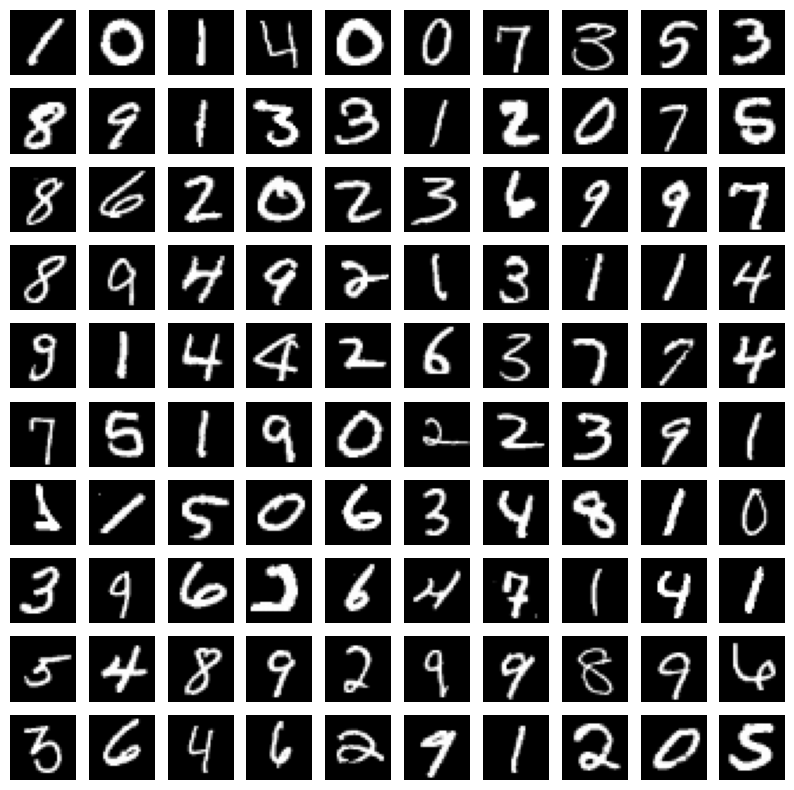

In [95]:
show_images(100)

In [96]:
def show_digits(digit, dataset=X):
    if digit in range(10):
        digit_indices = np.where(y == digit)[0]
        
        for i in range(50):  # Display the first 50 images of the digit
            plt.subplot(5, 10, i + 1)
            imdata = dataset.iloc[digit_indices[i]].values.reshape(28, 28)
            plt.imshow(imdata, cmap='gray')
            plt.xticks([])
            plt.yticks([])

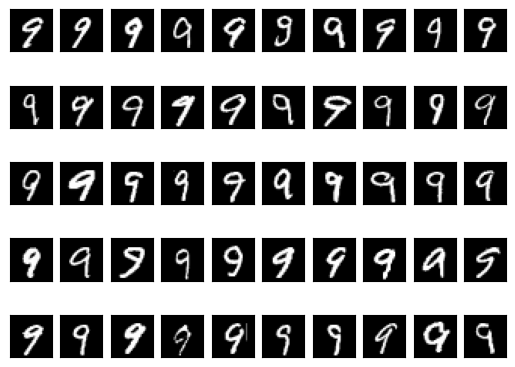

In [97]:
show_digits(9)

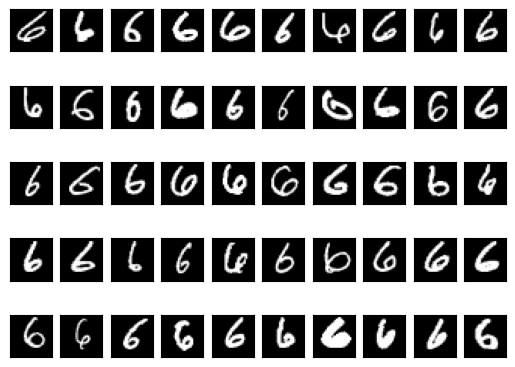

In [98]:
show_digits(6)

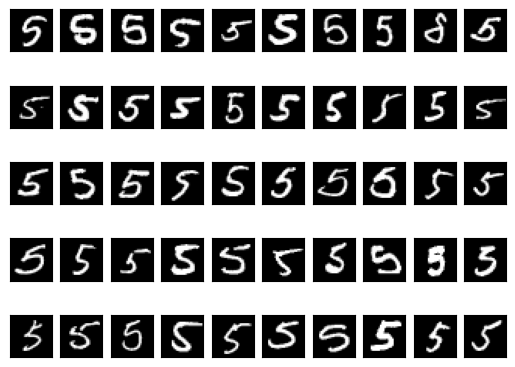

In [69]:
show_digits(5)

In [101]:
import joblib
def fit_forest(X, y, save = (False, 'model_digitREC'), plot =True):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)
    clf = RandomForestClassifier(n_estimators=130, max_depth=None)
    clf.fit(X_train, y_train)
    # predictions
    y_pred = clf.predict(X_test)
    # scoring
    mat =confusion_matrix(y_test, y_pred)
    if plot:
       plt.figure(figsize=(8,8), dpi=170)
       sns.heatmap(mat, annot=True, linewidths=0.5, cmap='Blues',fmt='d')
       plt.show()
    else:
       print(mat)
    acc = accuracy_score(y_test, y_pred)
    print(acc)
    if save[0]:
        joblib.dump(clf, f'{save[1]}.joblib')
    return acc

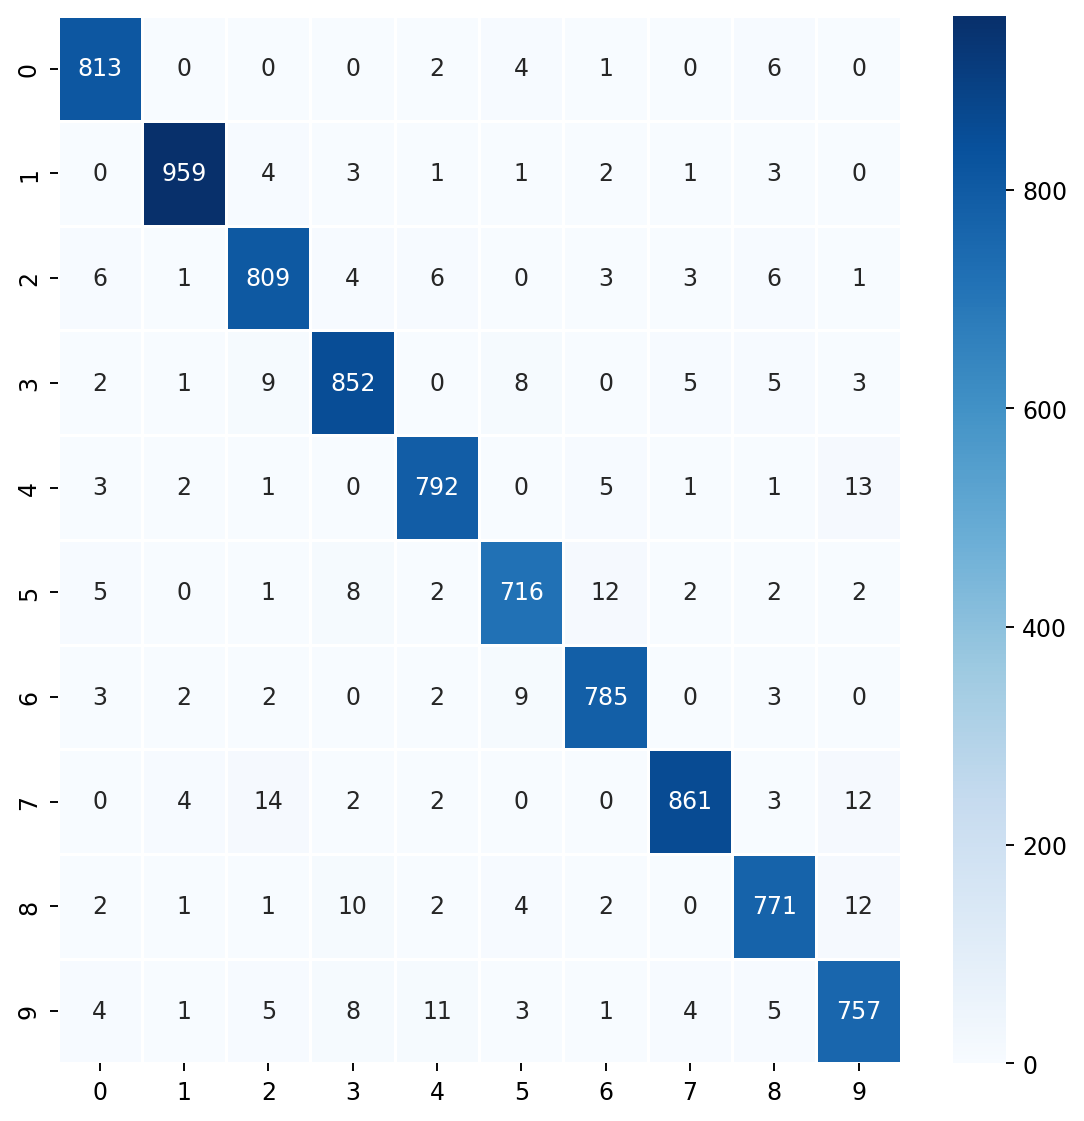

0.9660714285714286
CPU times: user 30.9 s, sys: 96.6 ms, total: 31 s
Wall time: 31 s


0.9660714285714286

In [102]:
%%time
fit_forest(X,y)

In [103]:
def do_pca(n_component, dataset):
    X = StandardScaler().fit_transform(dataset)
    pca = PCA(n_components=n_component)
    x_pca = pca.fit_transform(X)
    return pca, x_pca

In [104]:
pca, X_pca = do_pca(2, X)

In [105]:
pca

PCA(n_components=2)

In [106]:
X_pca

array([[-5.1404855 , -5.22655221],
       [19.29237105,  6.03372293],
       [-7.64450461, -1.70573962],
       ...,
       [ 0.49540744,  7.07680341],
       [ 2.30727083, -4.34449612],
       [-4.80764383,  1.55906138]])

In [107]:
f"X shape {X.shape}", f"X_PCA shape {X_pca.shape}"

('X shape (42000, 784)', 'X_PCA shape (42000, 2)')

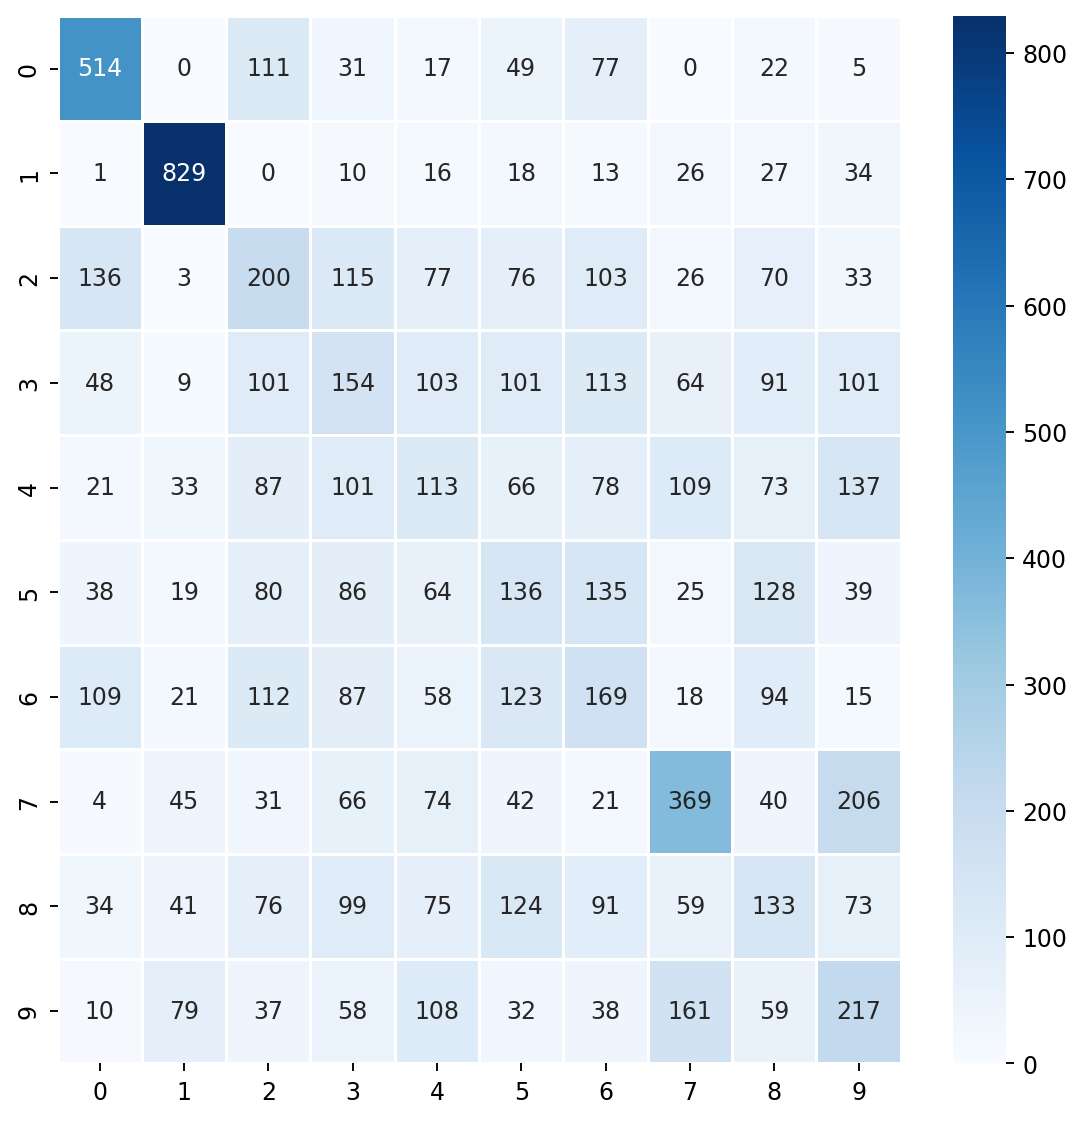

0.3373809523809524
CPU times: user 9.99 s, sys: 312 ms, total: 10.3 s
Wall time: 10.3 s


0.3373809523809524

In [108]:
%%time
fit_forest(X_pca,y)

In [111]:
import matplotlib.pyplot as plt
import numpy as np

def plot_components(X, y, title="Component Plot"):
    # Normalize X to [0, 1] for consistent visualization
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    # Plot setup
    plt.figure(figsize=(10, 6))
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1(y[i] % 9),  # modulo for safety
                 fontdict={'size': 15})

    # Add axis labels
    plt.xlabel("Component 1", fontsize=12)
    plt.ylabel("Component 2", fontsize=12)

    # Optional: Add title
    plt.title(title, fontsize=14)

    # Clean axes
    plt.xticks([]), plt.yticks([])
    plt.ylim([-0.1, 1.1]), plt.xlim([-0.1, 1.1])
    plt.grid(False)
    plt.tight_layout()
    plt.show()


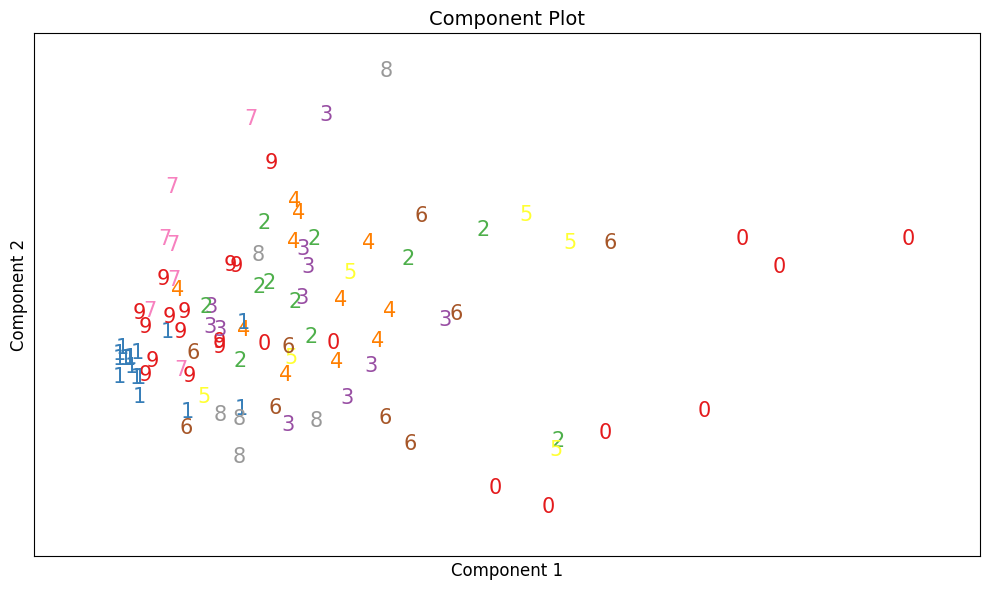

In [112]:
plot_components(X_pca[:100], y[:100])

In [113]:
# accls = [] # accuracy list
# def tryPCA(start, end, step, clear = False):
#     if clear:
#         accls.clear()
#     for reduced_featured in range(start, end, step):
#         print(f"number of features {reduced_featured}")
#         pca, x_pca = do_pca(reduced_featured, X)
#         accls.append(fit_forest(x_pca, y, plot=False))

In [120]:
import time

accls = []        # List of accuracy values
times = []        # List of runtimes (in seconds)

def tryPCA(start, end, step, clear=True):
    if clear:
        accls.clear()
        times.clear()

    for reduced_features in range(start, end, step):
        print(f"Number of PCA components: {reduced_features}")
        start_time = time.time()

        # Apply PCA and get transformed data
        pca, x_pca = do_pca(reduced_features, X)

        # Fit model and evaluate accuracy
        acc = fit_forest(x_pca, y, plot=False)
        runtime = time.time() - start_time

        # Record accuracy and time
        accls.append(acc)
        times.append(runtime)

        print(f"  Accuracy: {acc:.4f} | Time: {runtime:.2f} sec")


In [114]:
X.shape

(42000, 784)

In [121]:
# this would try to reduce the number of features 
# and see what a number of feature give us meaning 
# so the orginal X features 784 and we got acc 96% 
# with only 18 feature we could reach 91%
# we can go beyond that 38 feature was 94%
# we can do even better 
# TODO: I would leave it for you to try and a find if you can do better 🫣💫
tryPCA(3, 40, 5)

Number of PCA components: 3
[[641   0  23   2  12  29  88   1  29   1]
 [  0 904   5  15   2   3  19   2  24   0]
 [ 61   1 392 176  20  34 109   0  45   1]
 [ 15  18 172 361  32  48 129  11  92   7]
 [ 21   6   5  12 440  60   7  61  34 172]
 [ 46   2  48  67  86 233 110  17 110  31]
 [105  31  57  40   6  36 450   1  80   0]
 [  3   7   3  13 106  19   4 516  11 216]
 [ 45  29  33 110  77 135 142  15 196  23]
 [  6   3   3   4 173  26   4 184   8 388]]
0.5382142857142858
  Accuracy: 0.5382 | Time: 10.47 sec
Number of PCA components: 8
[[794   0   5   2   3  12   6   0   4   0]
 [  0 950   9   6   0   2   2   0   5   0]
 [ 12   2 745  19  20   3  11   5  22   0]
 [  2   6  22 747   5  31   3   8  60   1]
 [  2   1   5   4 630   1  12  15   9 139]
 [ 24   0   4  50  10 608  17   5  26   6]
 [ 11   3  11   1   2   9 762   0   7   0]
 [  3   5  14   4  11   2   0 801  10  48]
 [ 14   5  16  48  21  29   5   4 651  12]
 [  2   1   2   4 128   5   2  41  25 589]]
0.8663095238095239
  Accur

In [140]:
def plot_accuracy_time(start, end, step, accls, times):
    components = list(range(start, end, step))

    fig, ax1 = plt.subplots(figsize=(9, 5))

    # Accuracy curve
    ax1.plot(components, accls, 'o-', color='lightgreen')
    ax1.set_xlabel("Number of PCA Components")
    ax1.set_ylabel("Accuracy", color='green')
    ax1.tick_params(axis='y', labelcolor='green')
    # ax1.set_ylim(0, 1.05)

    # Time curve (secondary axis)
    ax2 = ax1.twinx()
    ax2.plot(components, times, 's--', color='salmon')
    ax2.set_ylabel("Time (sec)", color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    plt.title("Accuracy and Runtime vs. PCA Components")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


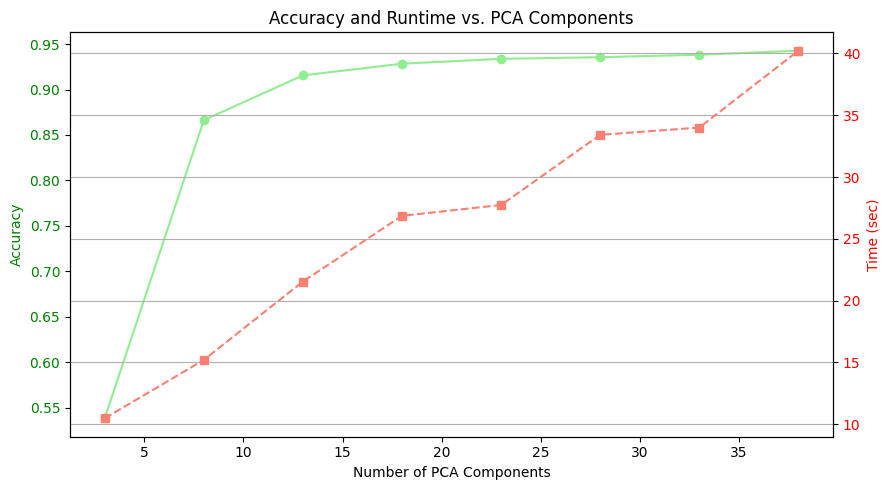

In [141]:
plot_accuracy_time(3, 40, 5, accls, times)

# <h1 style="color:skyblue" id="9">KMEANs</h1>

In [167]:
import pandas as pd
customers = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')

In [143]:
customers.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [144]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [145]:
customers.drop(columns='CustomerID').describe()

Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000          200.000000              200.000000
mean    38.850000           60.560000               50.200000
std     13.969007           26.264721               25.823522
min     18.000000           15.000000                1.000000
25%     28.750000           41.500000               34.750000
50%     36.000000           61.500000               50.000000
75%     49.000000           78.000000               73.000000
max     70.000000          137.000000               99.000000

In [146]:
customers.describe(include='O')

Gender
count      200
unique       2
top     Female
freq       112

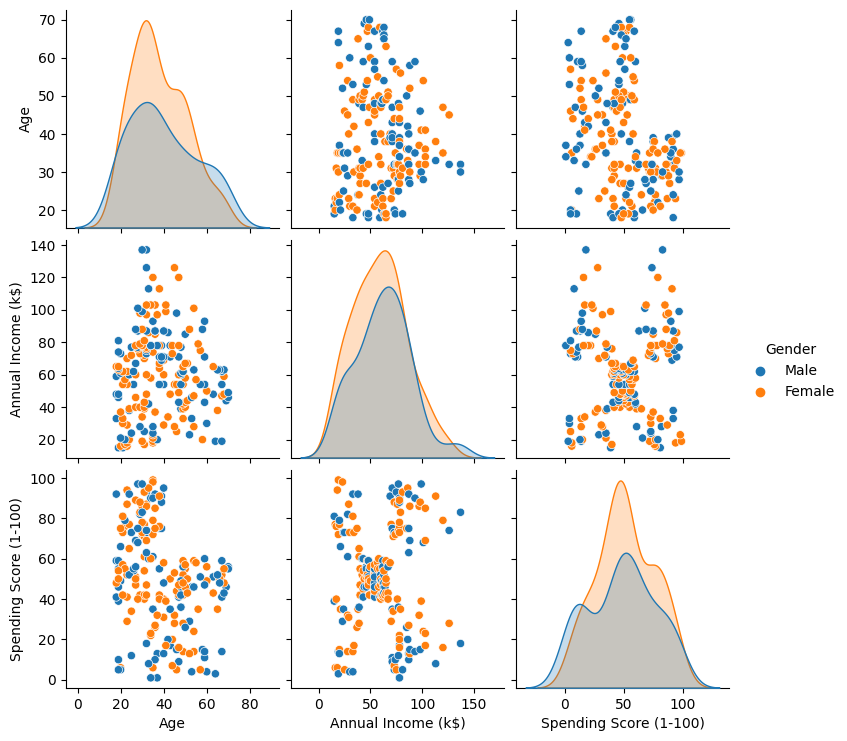

In [168]:
import seaborn as sns
sns.pairplot(customers.drop(columns='CustomerID'), hue='Gender');

In [169]:
customers.drop(columns='CustomerID', inplace=True)

In [170]:
# Encoding
customers['Gender'] = customers['Gender'].astype('category').cat.codes
customers['Gender'].value_counts()

Gender
0    112
1     88
Name: count, dtype: int64

In [172]:
customers[['Gender']]

Gender
0         1
1         1
2         0
3         0
4         0
..      ...
195       0
196       0
197       1
198       1
199       1

[200 rows x 1 columns]

In [173]:
customers.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [174]:
numCols = customers.select_dtypes(include='int').columns
numCols

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [152]:
# Scalling 
from sklearn.preprocessing import StandardScaler

In [155]:
ds = customers
s = StandardScaler()
for col in numCols:
    ds[col] = s.fit_transform(ds[col].to_numpy().reshape(-1,1))
ds

Gender       Age  Annual Income (k$)  Spending Score (1-100)
0         1 -1.424569           -1.738999               -0.434801
1         1 -1.281035           -1.738999                1.195704
2         0 -1.352802           -1.700830               -1.715913
3         0 -1.137502           -1.700830                1.040418
4         0 -0.563369           -1.662660               -0.395980
..      ...       ...                 ...                     ...
195       0 -0.276302            2.268791                1.118061
196       0  0.441365            2.497807               -0.861839
197       1 -0.491602            2.497807                0.923953
198       1 -0.491602            2.917671               -1.250054
199       1 -0.635135            2.917671                1.273347

[200 rows x 4 columns]

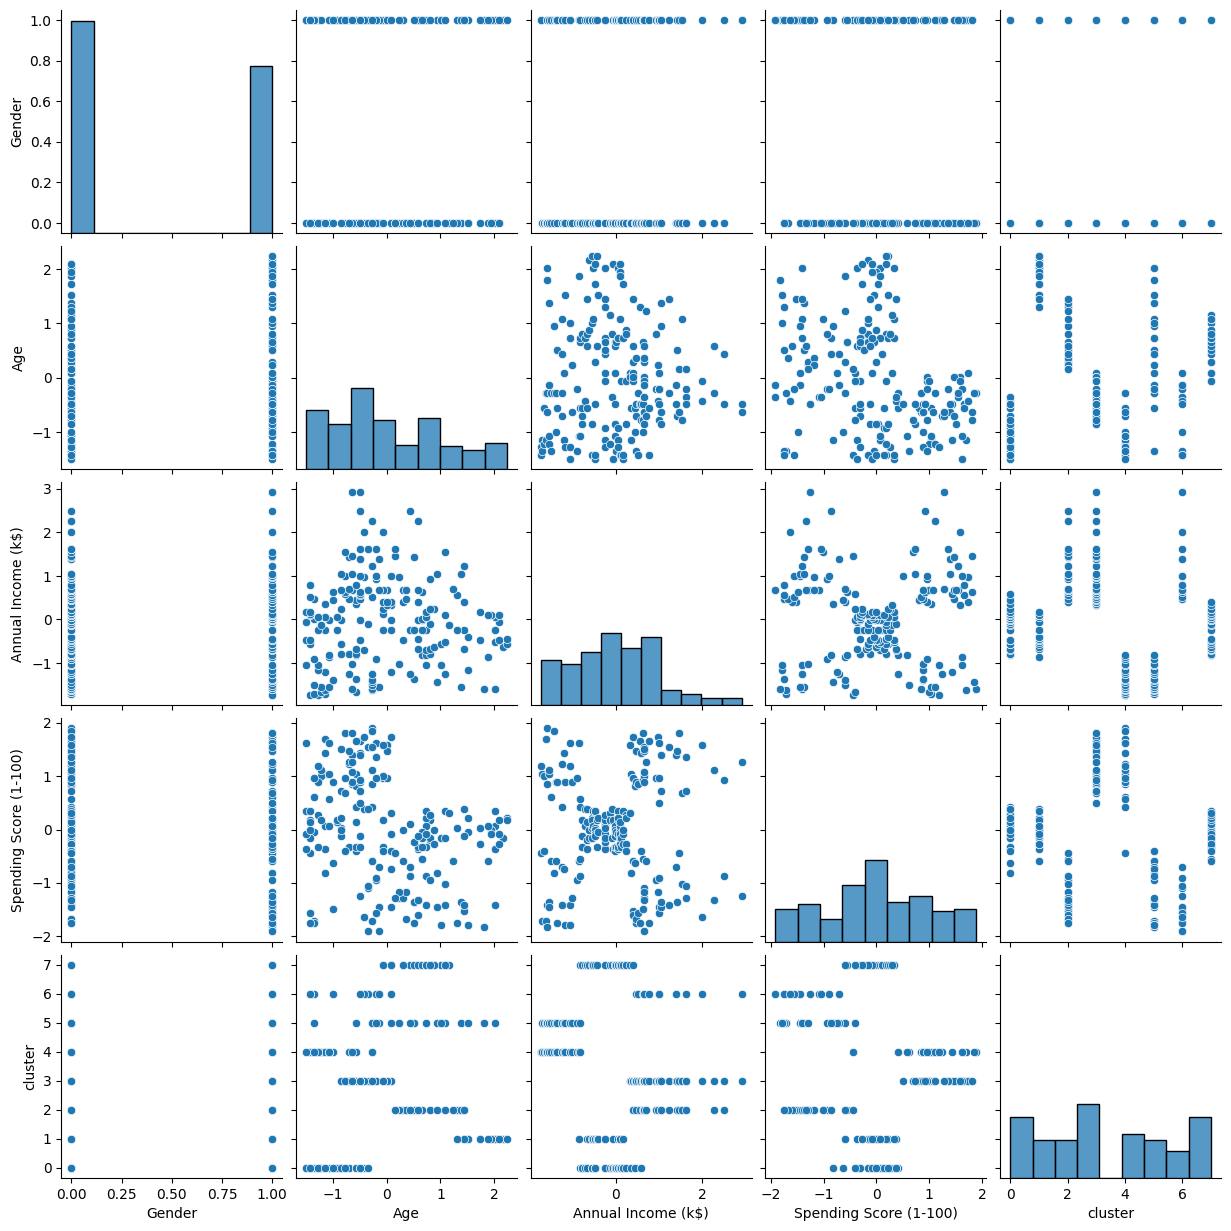

In [175]:
sns.pairplot(data=ds)

In [157]:
from sklearn.cluster import KMeans

In [158]:
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [159]:
def plot_3d_clusters(df, feature_cols, num_clusters):
    # extract the feature columns from the dataframe
    X = df[feature_cols]

    # perform K-means clustering with the specified number of clusters
    kmeans = KMeans(n_clusters=num_clusters, random_state=42).fit(X)
    df['cluster'] = kmeans.labels_

    # create 3D scatter plot of the clustered data
    fig = go.Figure(data=[go.Scatter3d(
        x=df[feature_cols[0]],
        y=df[feature_cols[1]],
        z=df[feature_cols[2]],
        mode='markers',
        marker=dict(
            color=df['cluster'],
            size=10,
            opacity=0.8
        )
    )])

    fig.update_layout(scene=dict(
        xaxis_title=feature_cols[0],
        yaxis_title=feature_cols[1],
        zaxis_title=feature_cols[2]
    ), title=f'K-means Clustering {num_clusters} Clusters 3D Scatter Plot')

    return fig

In [160]:
def createKmeanModels(data, max_k, min_k =1):
    kmodels = [KMeans(n_clusters=k).fit(data) for k in range(min_k, max_k)]
    return kmodels

In [161]:
import warnings
warnings.filterwarnings("ignore")

In [163]:
for i in range(2, 9):
    fig = plot_3d_clusters(ds, ['Age', 'Annual Income (k$)','Spending Score (1-100)'], num_clusters=i)
    fig.show()

In [164]:
def elbow_plot(data, max_k):
   
    models = createKmeanModels(data, max_k)
    distortions = [model.inertia_ for model in models]

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=list(range(1, max_k+1)), y=distortions, mode='lines+markers'))
    fig.update_layout(title='Elbow plot for KMeans clustering',
                      xaxis_title='Number of clusters',
                      yaxis_title='Distortion')

    return fig

In [165]:
elbow_plot(ds, 9)

# <h1 style="color:skyblue" id="10">KMEANs for Image segmentation</h1>

In [180]:
!wget -O image.jpg "https://images.unsplash.com/photo-1750779940886-edfa73b5c5c6?q=80&w=1170&auto=format&fit=crop&ixlib=rb-4.1.0&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D"


--2025-07-01 00:00:16--  https://images.unsplash.com/photo-1750779940886-edfa73b5c5c6?q=80&w=1170&auto=format&fit=crop&ixlib=rb-4.1.0&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D
Resolving images.unsplash.com (images.unsplash.com)... 151.101.130.208, 151.101.66.208, 151.101.2.208, ...
Connecting to images.unsplash.com (images.unsplash.com)|151.101.130.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 158336 (155K) [image/jpeg]
Saving to: ‘image.jpg’

image.jpg           100%[===================>] 154.62K  --.-KB/s    in 0.01s   

2025-07-01 00:00:19 (15.1 MB/s) - ‘image.jpg’ saved [158336/158336]



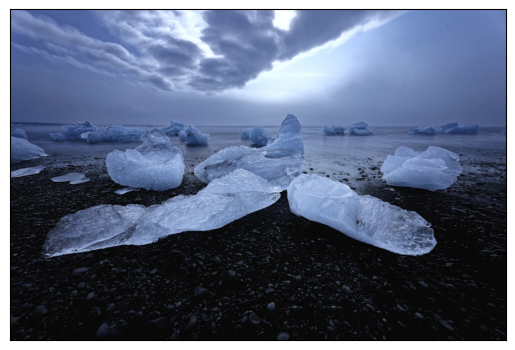

In [185]:
import matplotlib.image as plm 
img = plm.imread("/kaggle/working/image.jpg")
plt.xticks([]), plt.yticks([])
plt.imshow(img);

In [186]:
img.shape # (780, 1170, 3)

(780, 1170, 3)

In [188]:
w, h, d = img.shape #width, hight, depth

In [187]:
img

array([[[127, 145, 193],
        [124, 142, 190],
        [123, 141, 189],
        ...,
        [105, 130, 186],
        [109, 133, 193],
        [110, 134, 194]],

       [[124, 142, 190],
        [121, 139, 187],
        [120, 138, 186],
        ...,
        [102, 127, 183],
        [104, 128, 188],
        [106, 130, 190]],

       [[122, 140, 188],
        [119, 137, 185],
        [118, 136, 184],
        ...,
        [101, 126, 182],
        [102, 126, 186],
        [103, 127, 187]],

       ...,

       [[ 11,  11,  13],
        [ 12,  12,  14],
        [ 12,  12,  14],
        ...,
        [  9,   9,   9],
        [ 10,  10,  10],
        [ 10,  10,  10]],

       [[ 16,  15,  20],
        [ 16,  16,  18],
        [ 14,  14,  16],
        ...,
        [  9,   9,   9],
        [ 10,  10,   8],
        [ 10,  10,   8]],

       [[ 18,  17,  22],
        [ 17,  16,  21],
        [ 13,  13,  15],
        ...,
        [  9,   9,   9],
        [ 11,  11,   9],
        [ 11,  11,   9]]

In [189]:
# flattent each color matrix to get the pixels
pixels = img.reshape(-1, 3) # any number of rows, 3 cols (1 for each color channel)
print(pixels.shape)
print(pixels)

(912600, 3)
[[127 145 193]
 [124 142 190]
 [123 141 189]
 ...
 [  9   9   9]
 [ 11  11   9]
 [ 11  11   9]]


In [195]:
k = 4  # Number of color clusters (or segments)
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(pixels)

segmented_pixels = kmeans.cluster_centers_[kmeans.labels_].astype(np.uint8)
segmented_image = segmented_pixels.reshape((w, h, d))

In [192]:
kmeans.cluster_centers_

array([[ 13.26627091,  14.49747857,  18.10621859],
       [ 76.16641916,  92.9287403 , 134.31385468],
       [190.41526966, 210.13953267, 239.83575601],
       [117.23941055, 138.00621091, 182.74314583]])

In [193]:
kmeans.labels_ # label for each point 

array([3, 3, 3, ..., 0, 0, 0], dtype=int32)

In [205]:
780*1170

912600

In [203]:
segmented_pixels.shape 

(912600, 3)

In [206]:
segmented_pixels # each pixel is assigned one of the k (4) centroids 

array([[117, 138, 182],
       [117, 138, 182],
       [117, 138, 182],
       ...,
       [ 13,  14,  18],
       [ 13,  14,  18],
       [ 13,  14,  18]], dtype=uint8)

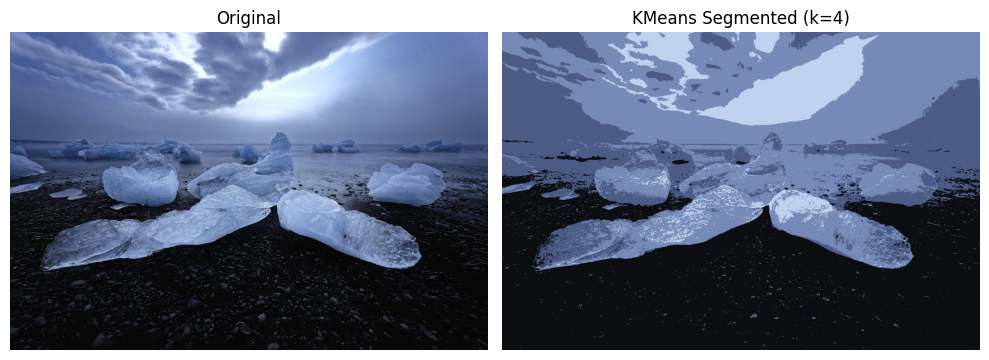

In [196]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image)
plt.title(f"KMeans Segmented (k={k})")
plt.axis('off')

plt.tight_layout()
plt.show()


In [198]:
label_colors = np.array([
    [255, 0, 0],    # Red
    [0, 255, 0],    # Green
    [0, 0, 255],    # Blue
    [255, 255, 0],  # Yellow
], dtype=np.uint8)

# Build the segmented image using label colors
segmented_flat = label_colors[kmeans.labels_]
segmented_image = segmented_flat.reshape((w, h, 3))

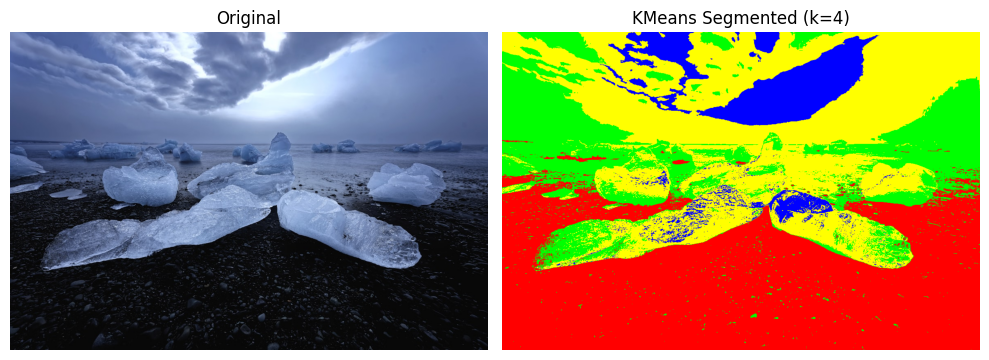

In [199]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image)
plt.title(f"KMeans Segmented (k={k})")
plt.axis('off')

plt.tight_layout()
plt.show()


# <h1 style="color:skyblue" id="11">A simple GUI for image segmentation with Gradio</h1>

In [200]:
! pip install gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.3/54.3 MB 29.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.9/323.9 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.5/95.5 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 94.1 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 4.1 MB/s eta 0:00:00


In [221]:
import numpy as np
from sklearn.cluster import KMeans

def segment_image(image, k, use_color_labels=False):
    # Handle RGBA: drop alpha channel if present
    if image.shape[2] == 4:
        image = image[:, :, :3]

    w, h, d = image.shape
    pixels = image.reshape(-1, d)

    # clustering
    kmeans = KMeans(n_clusters=k, random_state=0).fit(pixels)
    labels = kmeans.labels_

    # 1) assign a label (centroid) for each pixel 
    if use_color_labels:
        np.random.seed(0)
        label_colors = np.random.randint(0, 255, size=(k, 3), dtype=np.uint8)
        segmented_pixels = label_colors[labels]
    else:
        segmented_pixels = kmeans.cluster_centers_[labels].astype(np.uint8)

    # reshape the flatten pixel to the grid (image)
    segmented_image = segmented_pixels.reshape((w, h, 3))
    return segmented_image


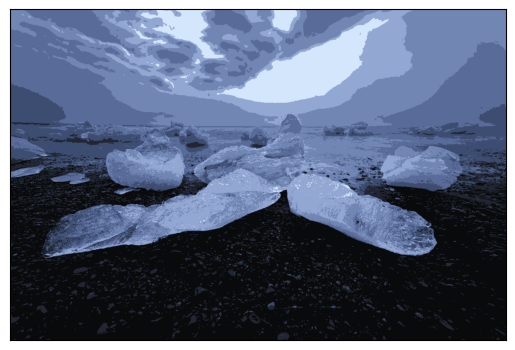

In [227]:
plt.imshow(segment_image(img, k=7))
plt.xticks([]), plt.yticks([])
plt.show()

In [228]:
type(img)

numpy.ndarray

In [230]:
import gradio as gr

iface = gr.Interface(
    fn=segment_image,  # your modified function
    inputs=[
        gr.Image(type="numpy", label="Upload Image"),
        gr.Slider(2, 10, step=1, label="Number of Segments (k)"),
        gr.Checkbox(label="Use Colors")
    ],
    outputs=gr.Image(label="Segmented Image"),
    title="KMeans Image Segmentation",
    description="Upload an image and choose how many color segments you want using KMeans clustering."
)

iface.launch()


* Running on local URL:  http://127.0.0.1:7861
It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

* Running on public URL: https://ea28759c5c1b588a7c.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
